In [17]:
!pip install pyspark


In [7]:
import pandas as pd

file_path = '/content/sample_data/StudentsPerformance.csv'
df = pd.read_csv(file_path)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
#checking any null values in dataset
df.isnull().values.any()
df12 = df.dropna()
df12.to_csv('clean_data12.csv', index=False)

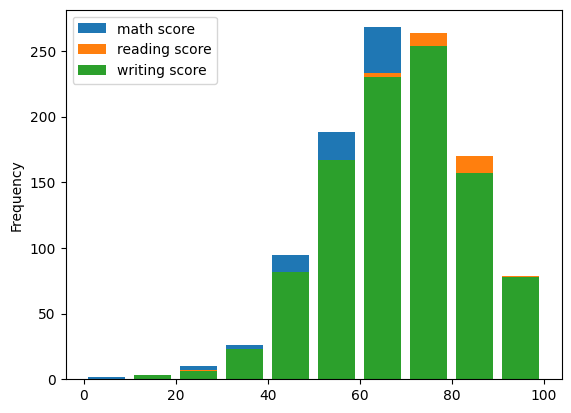

In [19]:
import matplotlib.pyplot as plt

#histogram of scores
df12[['math score', 'reading score', 'writing score']].plot(kind='hist', rwidth=0.8)
plt.show()

I used this vizualization because there are total 3 kinds of score which means we should compare 3 variables in a same visual. Histogram is the appropriate one as Ii was able to compare trends simultaneously while comapring each scores.

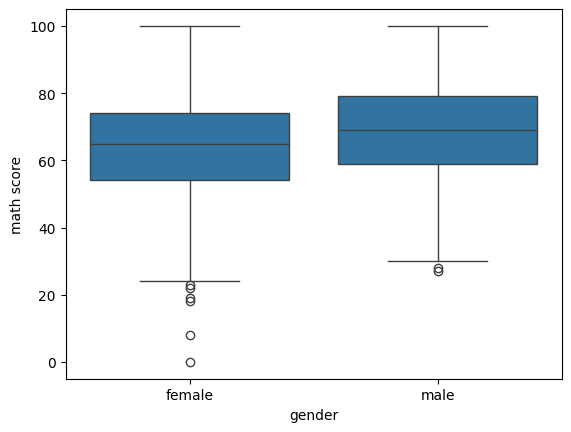

In [20]:
import seaborn as sns

# boxplots for scores by gender
sns.boxplot(x='gender', y='math score', data=df12)
plt.show()

The box plot is a standard way of visualizing the distribution of data, and it is especially useful when comparing distributions across different categories.
This can help identify if there are significant differences in math performance between genders.

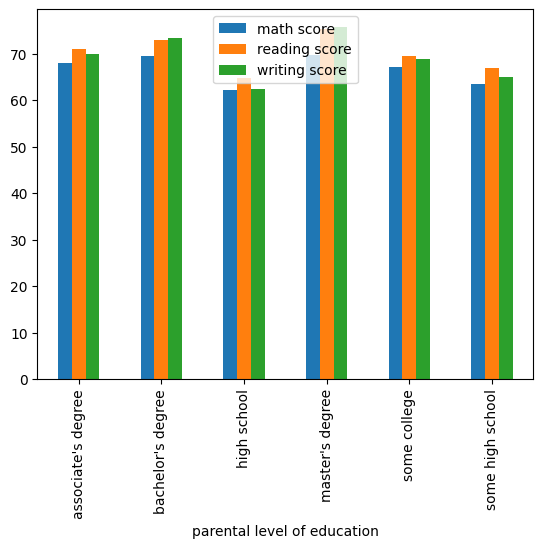

In [21]:
#barchart of average score by parental level education
df12.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar')
plt.show()

 It’s a neat way to see all the scores side by side. I can quickly spot if there’s a trend, like maybe students with parents who went to grad school tend to score higher. It’s a clear, simple way to visualize our data.


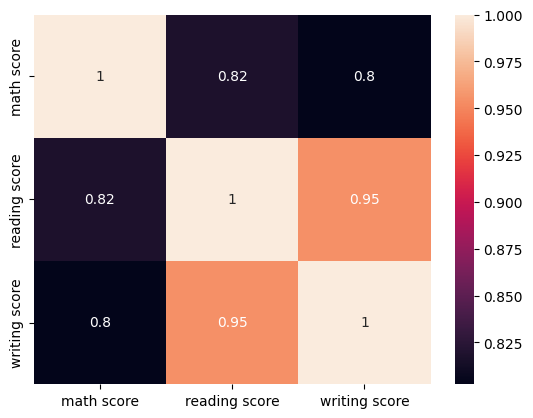

In [22]:
#heatmap of corelations
corr = df12[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True)
plt.show()

The colors in the heatmap represent the strength and direction of the correlation: darker colors mean stronger correlation, and whether it’s positive or negative depends on the color scale. This makes it super easy to see at a glance which scores move together. For example, if the math and reading scores have a strong positive correlation, it means students who do well in math also tend to do well in reading. It’s a really handy tool for spotting patterns in the data.

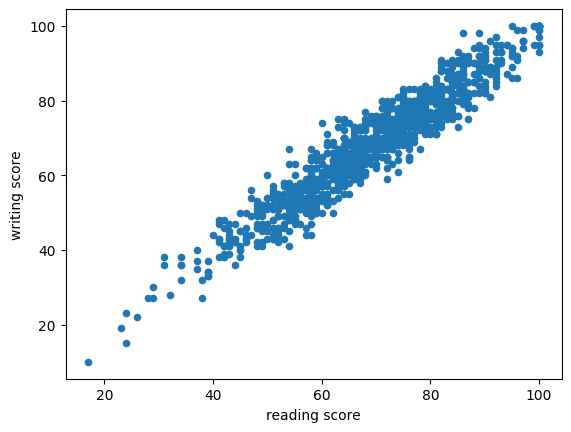

In [23]:
#scatter plot of reading vs writing score
df12.plot(kind='scatter', x='reading score', y='writing score')
plt.show()

A scatter plot is used to see the relationship between two variables. Here, we are checking if students who score high in reading also score high in writing. If dots form a line going up, it means yes, high reading scores go with high writing scores. If there’s no line or pattern, then there’s no relationship between the two scores. To visualize this kind of relationship scatter plot is really helpful.